In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import List, Literal, Dict


In [15]:
# Mode specifies how resolution values are interpreted
Mode = Literal["FWHM", "RES_PCT"]

def energies_from_ch(m: float, c: float, x0_ch: List[float]) -> np.ndarray:
    """
    Convert channel positions to energy (keV).
    Uses calibration function: E = m*x + c
    """
    x = np.asarray(x0_ch, dtype=float)
    return m * x + c

def res_from_fwhm_pct_or_channels(mode: Mode, values: List[float], x0_ch: List[float]) -> np.ndarray:
    """
    Convert resolution data into percentage values.
    
    - If mode == "FWHM": 
        values are FWHM in channels. Convert to %:
        Resolution = (FWHM / centroid) * 100
    - If mode == "RES_PCT":
        values are already resolution (%) at centroid.
    """
    v = np.asarray(values, dtype=float)
    x = np.asarray(x0_ch, dtype=float)
    if mode == "FWHM":
        return (v / x) * 100.0
    elif mode == "RES_PCT":
        return v
    else:
        raise ValueError("mode must be 'FWHM' or 'RES_PCT'")


In [16]:
# BGO detector
_BGO_m, _BGO_c = 0.381566, 4.016
_BGO_labels   = ["137Cs", "60Co (a)", "60Co (b)", "241Am"]
_BGO_x0_ch    = [1724.39, 3061.74, 3483.43, 145.43]
_BGO_RES_pct  = [11.6481770365, 7.9418892525, 6.9730122322, 68.1702537303]   # already in %
_BGO_E = energies_from_ch(_BGO_m, _BGO_c, _BGO_x0_ch)
_BGO_R = res_from_fwhm_pct_or_channels("RES_PCT", _BGO_RES_pct, _BGO_x0_ch)

# CSI detector
_CSI_m, _CSI_c = 0.427954, -50.740
_CSI_labels  = ["137Cs", "60Co CE", "22Na"]
_CSI_x0_ch   = [1656.43,  605.01, 1324.64]
_CSI_FWHM    = [241.54, 420.29, 216.97]      # FWHM in channels
_CSI_E = energies_from_ch(_CSI_m, _CSI_c, _CSI_x0_ch)
_CSI_R = res_from_fwhm_pct_or_channels("FWHM", _CSI_FWHM, _CSI_x0_ch)

# LYSO detector
_LYSO_m, _LYSO_c = 0.682827, -83.481
_LYSO_labels = ["137Cs", "60Co CE", "22Na"]
_LYSO_x0_ch  = [1173.90,  450.87, 1967.86]
_LYSO_FWHM   = [225.65, 294.75, 213.10]
_LYSO_E = energies_from_ch(_LYSO_m, _LYSO_c, _LYSO_x0_ch)
_LYSO_R = res_from_fwhm_pct_or_channels("FWHM", _LYSO_FWHM, _LYSO_x0_ch)

# NaI detector
_NaI_m, _NaI_c = 3.370190, -29.591
_NaI_labels  = ["137Cs", "22Na", "60Co (a)", "60Co (b)", "241Am"]
_NaI_x0_ch   = [207.63, 164.34, 354.87, 403.24, 22.94]
_NaI_RES_pct = [13.32, 15.24, 9.97, 11.90, 50.05]   # already in %
_NaI_E = energies_from_ch(_NaI_m, _NaI_c, _NaI_x0_ch)
_NaI_R = res_from_fwhm_pct_or_channels("RES_PCT", _NaI_RES_pct, _NaI_x0_ch)

# Plastic scintillator detector
_P_m, _P_c = 0.159674, 299.443
_P_labels = ["22Na BS(511)", "22Na 511", "137Cs 662"]
_P_x0_ch  = [199.34, 1513.44, 2140.87]
_P_FWHM   = [134.89, 375.07, 555.42]
_P_E = energies_from_ch(_P_m, _P_c, _P_x0_ch)
_P_R = res_from_fwhm_pct_or_channels("FWHM", _P_FWHM, _P_x0_ch)


In [12]:
# Build a DataFrame combining all detectors (no CSV written)
rows = []
for det, d in DETECTORS.items():
    for E, R, lab in zip(d["E"], d["R"], d["labels"]):
        rows.append({
            "detector": det,
            "line": lab,
            "energy_keV": float(E),
            "resolution_pct": float(R),
        })

df = (
    pd.DataFrame(rows)
      .sort_values(["detector", "energy_keV"])
      .reset_index(drop=True)
)

# Show the full table in the notebook
df

,detector,line,energy_keV,resolution_pct
0,BGO,241Am,59.507143,68.170000
1,BGO,137Cs,661.984595,11.650000
2,BGO,60Co (a),1172.271885,7.940000
3,BGO,60Co (b),1333.174451,6.970000
4,CSI,60Co CE,208.176450,69.468273
5,CSI,22Na,516.144987,16.379545
6,CSI,137Cs,658.135844,14.581962
7,LYSO,60Co CE,224.385209,65.373611
8,LYSO,137Cs,718.089615,19.222251
9,LYSO,22Na,1260.226940,10.829022


In [ ]:
# Build dictionary of all detectors
DETECTORS: Dict[str, Dict[str, np.ndarray]] = {
    "BGO":     {"E": _BGO_E, "R": _BGO_R, "labels": _BGO_labels},
    "CSI":     {"E": _CSI_E, "R": _CSI_R, "labels": _CSI_labels},
    "LYSO":    {"E": _LYSO_E, "R": _LYSO_R, "labels": _LYSO_labels},
    "NaI":     {"E": _NaI_E, "R": _NaI_R, "labels": _NaI_labels},
    "Plastic": {"E": _P_E,   "R": _P_R,   "labels": _P_labels},
}

# Convert to a DataFrame for analysis/display
rows = []
for det, d in DETECTORS.items():
    for E, R, lab in zip(d["E"], d["R"], d["labels"]):
        rows.append({
            "detector": det, 
            "line": lab, 
            "energy_keV": float(E), 
            "resolution_pct": float(R)
        })

df = (
    pd.DataFrame(rows)
      .sort_values(["detector", "energy_keV"])
      .reset_index(drop=True)
)

# Show the full table in the notebook
df

,detector,line,energy_keV,resolution_pct
0,BGO,241Am,59.507143,68.170254
1,BGO,137Cs,661.984595,11.648177
2,BGO,60Co (a),1172.271885,7.941889
3,BGO,60Co (b),1333.174451,6.973012
4,CSI,60Co CE,208.176450,69.468273
5,CSI,22Na,516.144987,16.379545
6,CSI,137Cs,658.135844,14.581962
7,LYSO,60Co CE,224.385209,65.373611
8,LYSO,137Cs,718.089615,19.222251
9,LYSO,22Na,1260.226940,10.829022


In [18]:
def res_model(E, a, b, c):
    E = np.asarray(E, dtype=float)
    return 100.0 * np.sqrt(a + b*E + c*(E**2)) / E

def fit_resolution_curve(E, R, R_err=None):
    """
    Fit resolution curve parameters (a, b, c).
    
    Steps:
    - Try non-linear fit with SciPy (weighted if errors are given).
    - If SciPy unavailable, use linearized least squares:
      (R*E/100)^2 ≈ a + bE + cE^2
    
    Returns:
        a, b, c, method_used (string)
    """
    E = np.asarray(E, float)
    R = np.asarray(R, float)

    try:
        from scipy.optimize import curve_fit

        mask = np.isfinite(E) & np.isfinite(R) & (E > 0)
        x = E[mask]; y = R[mask]

        if R_err is not None:
            R_err = np.asarray(R_err, float)
            mask = mask & np.isfinite(R_err) & (R_err > 0)
            x = E[mask]; y = R[mask]; sigma = R_err[mask]
        else:
            sigma = None

        if x.size >= 3:
            p0 = (1.0, 0.05, 1e-4)
            popt, _ = curve_fit(
                res_model, x, y, p0=p0,
                sigma=(sigma if sigma is not None else None),
                absolute_sigma=(sigma is not None),
                maxfev=20000
            )
            return (*popt, "SciPy curve_fit" + (" (weighted)" if sigma is not None else " (unweighted)"))
    except Exception:
        pass  # fallback

    # Fallback: linearized OLS
    mask = np.isfinite(E) & np.isfinite(R) & (E > 0)
    x = E[mask]; y = R[mask]
    t = (y * x / 100.0) ** 2
    X = np.vstack([np.ones_like(x), x, x**2]).T
    coef, *_ = np.linalg.lstsq(X, t, rcond=None)
    a, b, c = coef
    return a, b, c, "Linearized OLS"


/var/folders/kz/n2g_xtfn6d5bqldcnk205my80000gn/T/ipykernel_4417/613194400.py:35: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(


Fit method: SciPy curve_fit (unweighted)
a = 23291.1, b = -8.81372, c = 0.00405519


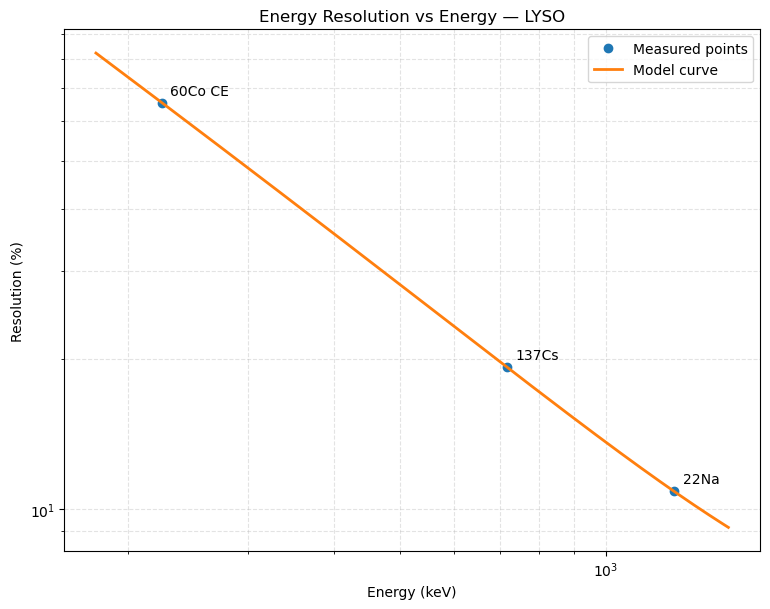

In [19]:
SELECTED_DETECTOR = "LYSO"  # options: BGO, CSI, LYSO, NaI, Plastic

SHOW_LABELS = True          # annotate peak labels
USE_LOGX = True             # log scale on x-axis
USE_LOGY = True             # log scale on y-axis
FIGSIZE = (7.8, 6.2)

# Extract data
if SELECTED_DETECTOR not in DETECTORS:
    raise ValueError(f"Unknown detector '{SELECTED_DETECTOR}'.")

d = DETECTORS[SELECTED_DETECTOR]
E_keV = np.asarray(d["E"], dtype=float)
R_pct = np.asarray(d["R"], dtype=float)
labels = [str(s) for s in d["labels"]]

R_pct_err = None  # optional errors

# Sort by energy for nicer plotting
order = np.argsort(E_keV)
E_keV, R_pct = E_keV[order], R_pct[order]
labels = [labels[i] for i in order]
if R_pct_err is not None:
    R_pct_err = np.asarray(R_pct_err, float)[order]

# Fit resolution model
a, b, c, method_used = fit_resolution_curve(E_keV, R_pct, R_pct_err)
x_line = np.linspace(E_keV.min() * 0.8, E_keV.max() * 1.2, 500)
y_line = res_model(x_line, a, b, c)

print(f"Fit method: {method_used}")
print(f"a = {a:.6g}, b = {b:.6g}, c = {c:.6g}")

# Plot
plt.figure(figsize=FIGSIZE)
plt.plot(E_keV, R_pct, "o", label="Measured points")
plt.plot(x_line, y_line, "-", linewidth=2.0, label="Model curve")

# Annotate peaks
if SHOW_LABELS:
    for x, y, s in zip(E_keV, R_pct, labels):
        plt.annotate(s, (x, y), xytext=(6, 6), textcoords="offset points",
                     fontsize=10)

# Apply log scales
if USE_LOGX: plt.xscale("log")
if USE_LOGY: plt.yscale("log")

plt.xlabel("Energy (keV)")
plt.ylabel("Resolution (%)")
plt.title(f"Energy Resolution vs Energy — {SELECTED_DETECTOR}")
plt.grid(True, which="both", linestyle="--", alpha=0.35)
plt.legend()
plt.tight_layout()
plt.show()


/var/folders/kz/n2g_xtfn6d5bqldcnk205my80000gn/T/ipykernel_4417/613194400.py:35: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(


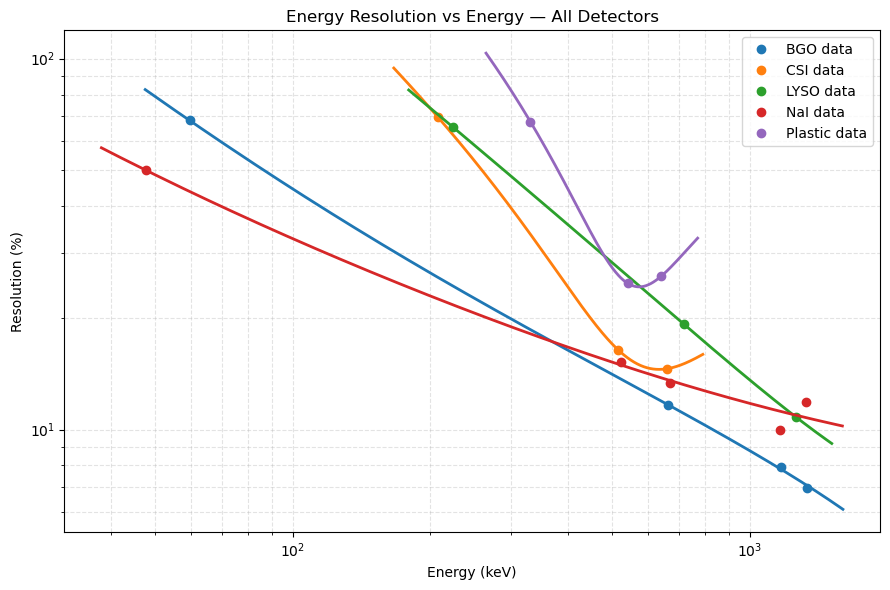

In [20]:
FIGSIZE_ALL = (9, 6)
USE_LOGX = True
USE_LOGY = True

plt.figure(figsize=FIGSIZE_ALL)
colors = plt.cm.tab10.colors

for i, (det, d) in enumerate(DETECTORS.items()):
    E_keV = np.asarray(d["E"], dtype=float)
    R_pct = np.asarray(d["R"], dtype=float)
    order = np.argsort(E_keV)
    E_keV, R_pct = E_keV[order], R_pct[order]

    a, b, c, _ = fit_resolution_curve(E_keV, R_pct)
    x_line = np.linspace(E_keV.min() * 0.8, E_keV.max() * 1.2, 400)
    y_line = res_model(x_line, a, b, c)

    color = colors[i % len(colors)]
    plt.plot(E_keV, R_pct, "o", color=color, label=f"{det} data")
    plt.plot(x_line, y_line, "-", color=color, linewidth=2)

if USE_LOGX: plt.xscale("log")
if USE_LOGY: plt.yscale("log")

plt.xlabel("Energy (keV)")
plt.ylabel("Resolution (%)")
plt.title("Energy Resolution vs Energy — All Detectors")
plt.grid(True, which="both", linestyle="--", alpha=0.35)
plt.legend()
plt.tight_layout()
plt.show()
